## import 包

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

## 读数据，预处理

In [2]:
df = pd.read_csv('D:/AI/Baidu/Baidu KDD CUP 2022/data/sdwpf_baidukddcup2022_full.csv')

def get_date(k):
    cur_date = "2020-01-01"
    one_day = timedelta(days=k-1)
    return str(datetime.strptime(cur_date, '%Y-%m-%d') + one_day)[:10]

df['Day'] = df['Day'].apply(lambda x: get_date(x))

def cols_concat(df, con_list):
    name = 't1'
    df[name] = df[con_list[0]].astype(str)
    for item in con_list[1:]:
        df[name] = df[name] + ' ' + df[item].astype(str)
    return df

df = cols_concat(df, ["Day", "Tmstamp"])

df = df[['TurbID', 't1', 'Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv']]
df['t1'] = pd.to_datetime(df['t1'])

In [3]:
df

,TurbID,t1,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,1,2020-01-01 00:00:00,12.23,-0.83,29.08,41.90,-23.73,1.07,1.07,1.07,-0.21,1549.53
1,1,2020-01-01 00:10:00,11.58,-3.32,29.01,42.01,-23.70,1.06,1.06,1.06,-0.25,1549.71
2,1,2020-01-01 00:20:00,11.21,-1.38,29.17,42.24,-28.84,1.04,1.04,1.04,-0.25,1534.77
3,1,2020-01-01 00:30:00,10.84,0.06,29.46,42.43,-31.39,1.03,1.03,1.03,-0.25,1508.20
4,1,2020-01-01 00:40:00,11.03,2.03,29.82,42.77,-31.39,1.03,1.03,1.03,-66.01,1517.76
...,...,...,...,...,...,...,...,...,...,...,...,...
3550459,134,2020-07-02 23:10:00,2.36,-74.19,7.30,11.70,238.59,90.39,90.37,90.36,-0.30,-0.30
3550460,134,2020-07-02 23:20:00,1.72,-67.92,7.21,11.70,238.59,90.39,90.37,90.36,-0.30,-0.30
3550461,134,2020-07-02 23:30:00,1.46,-59.15,7.10,11.70,238.59,90.39,90.37,90.36,-0.30,-0.30
3550462,134,2020-07-02 23:40:00,1.31,-64.11,7.10,11.70,238.59,90.39,90.37,90.36,-0.30,-0.30


## AutoX.AutoTS

In [4]:
from autox import AutoTS
autots = AutoTS(df = df,
                id_col = 'TurbID',
                time_col = 't1',
                target_col = 'Patv',
                time_varying_cols = ['Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv'],
                time_interval_num = 15,
                time_interval_unit = 'minute',
                forecast_period = 4*24*2)

In [5]:
sub = autots.get_result()

   INFO ->  [+] feature engineer
   INFO ->  [+] fe_rolling_stat
100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [04:14<00:00, 63.63s/it]
   INFO ->  [+] fe_lag
   INFO ->  [+] fe_diff
   INFO ->  [+] fe_time
   INFO ->  [+] feature combination
100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.15s/it]
   INFO ->  [+] construct data
 22%|█████████████████▋                                                             | 43/192 [53:27<3:07:37, 75.56s/it]   INFO ->  [+] sample data, frac=0.007334722072007114


 47%|████████████████████████████████████                                         | 90/192 [1:55:30<2:18:17, 81.35s/it]   INFO ->  [+] sample data, frac=0.007334722072007114


 71%|█████████████████████████████████████████████████████▌                     | 137/192 [3:11:31<2:00:18, 131.25s/it]   INFO ->  [+] sample data, frac=0.007334722072007114


 96%|█████████████████████████████████████████████████████████████████████████▊   | 184/192 [4:49:07<14:51, 111.48s/it]   INFO ->  [+] sample data, frac=0.007334722072007114


100%|██████████████████████████████████████████████████████████████████████████████| 192/192 [5:04:22<00:00, 95.12s/it]
   INFO ->  [+] fe_time_add
   INFO ->  [+] fe_time_add
   INFO ->  [+] feature_filter
100%|████████████████████████████████████████████████████████████████████████████████| 375/375 [00:34<00:00, 10.87it/s]
   INFO ->  [+] train model


not_used: ['t2', 't1', 't2_year', 'y', 't1_year']
2020-01-01 00:35:00 2020-07-01 16:05:00
2020-07-01 16:10:00 2020-07-03 15:50:00
(4918971, 375) (81093, 375)
used_features: ['TurbID', 'Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv', 'TurbID__Wspd__4__mean', 'TurbID__Wspd__4__std', 'TurbID__Wspd__4__median', 'TurbID__Wspd__4__max', 'TurbID__Wspd__4__min', 'TurbID__Wspd__4__kurt', 'TurbID__Wspd__4__skew', 'TurbID__Wdir__4__mean', 'TurbID__Wdir__4__std', 'TurbID__Wdir__4__median', 'TurbID__Wdir__4__max', 'TurbID__Wdir__4__min', 'TurbID__Wdir__4__kurt', 'TurbID__Wdir__4__skew', 'TurbID__Etmp__4__mean', 'TurbID__Etmp__4__std', 'TurbID__Etmp__4__median', 'TurbID__Etmp__4__max', 'TurbID__Etmp__4__min', 'TurbID__Etmp__4__kurt', 'TurbID__Etmp__4__skew', 'TurbID__Itmp__4__mean', 'TurbID__Itmp__4__std', 'TurbID__Itmp__4__median', 'TurbID__Itmp__4__max', 'TurbID__Itmp__4__min', 'TurbID__Itmp__4__kurt', 'TurbID__Itmp__4__skew', 'TurbID__Ndir__4__mean', 'TurbID__Ndir__

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Training on model 1
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.3899927210061127 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.6485237330340494 will be ignored. Current value: lambda_l2=1
Training until validation scores don't improve for 150 rounds
[100]	training's rmse: 298.34	valid_1's rmse: 382.353
Early stopping, best iteration is:
[8]	training's rmse: 376.757	valid_1's rmse: 316.658
rmse: 316.6581332476997
ReTraining on all data
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.3899927210061127 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.6485237330340494 will be ignored. Current value: lambda_l2=1


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [05:14<00:00, 314.18s/it]

Model 1 finished in 0:05:14.170424


## 查看特征重要性

In [6]:
autots.feature_importances.head(10)

,feature,model_1,average
0,t2_day,87,87.0
1,t1_day,38,38.0
2,t1_weekofyear,33,33.0
3,t2_weekofyear,32,32.0
4,t1_month,29,29.0
5,t1_dayofweek,23,23.0
6,TurbID,22,22.0
7,k_step,18,18.0
8,t2_dayofweek,12,12.0
9,t2_month,11,11.0


## 输出结果

In [7]:
sub.to_csv("D:/AI/Baidu/Baidu KDD CUP 2022/data/autox_kdd.csv", index=False)

## 画图

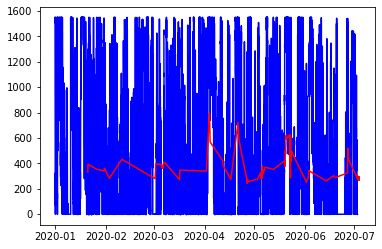

In [8]:
cur_TurbID = 1

plt.plot(df.loc[df['TurbID'] == cur_TurbID, 't1'], df.loc[df['TurbID'] == cur_TurbID, 'Patv'], color = 'b')
plt.plot(sub.loc[sub['TurbID'] == cur_TurbID, 't2'], sub.loc[sub['TurbID'] == cur_TurbID, 'y_mean'], color = 'r')

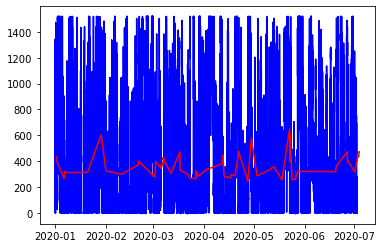

In [9]:
cur_TurbID = 3

plt.plot(df.loc[df['TurbID'] == cur_TurbID, 't1'], df.loc[df['TurbID'] == cur_TurbID, 'Patv'], color = 'b')
plt.plot(sub.loc[sub['TurbID'] == cur_TurbID, 't2'], sub.loc[sub['TurbID'] == cur_TurbID, 'y_mean'], color = 'r')